In [1]:
import mlflow
from mlflow import MlflowClient


In [2]:
tracking_uri="http://localhost:5000"
model_name = "Finlytik-RSF"

In [3]:
client = MlflowClient(tracking_uri)
filter_string = "name LIKE 'Finly%'"
results = client.search_registered_models(filter_string=filter_string)  #
# for res in results:
#     for mv in res.latest_versions:
#         print("name={}; run_id={}; version={}".format(mv.name, mv.run_id, mv.version))


In [4]:
results

[<RegisteredModel: creation_timestamp=1677522235998, description='', last_updated_timestamp=1677562955693, latest_versions=[<ModelVersion: creation_timestamp=1677522236048, current_stage='Archived', description=('The model version 1 was transitioned to Production on 2023-02-27 '
  '21:23:56.120903'), last_updated_timestamp=1677562955693, name='Finlytik-CSF', run_id='db90001a8d1044ab85440ba9aa595be8', run_link='', source='/home/main/Documents/kazispaces/dsrc/py/finlytik-app/training/mlflow_repo/1/db90001a8d1044ab85440ba9aa595be8/artifacts/Finlytik-CSF', status='READY', status_message='', tags={'Application': 'Finlytik', 'release.version': '0.1.0'}, user_id='', version='1'>,
  <ModelVersion: creation_timestamp=1677562955655, current_stage='Production', description=('The model version 2 was transitioned to Production on 2023-02-28 '
  '08:42:35.725464'), last_updated_timestamp=1677562955729, name='Finlytik-CSF', run_id='d237dc3908b747a6b77b1d474923d45f', run_link='', source='/home/main/Do

In [5]:
results[0].latest_versions[0].run_id

'db90001a8d1044ab85440ba9aa595be8'

In [6]:
def downloadModel(tracking_uri: str, model_name: str= None, search_prefix: str= "Finly") -> None:
    mlflow.set_tracking_uri(tracking_uri)
    client = MlflowClient(tracking_uri)
    if model_name:
        version_info = client.search_model_versions(f"name='{model_name}'")
        run_id = version_info[0].run_id
        
    else:
        version_info = client.search_registered_models(
            filter_string=f"name LIKE '{search_prefix}%'")
        run_id = version_info[0].latest_versions[0].run_id

    mlflow.artifacts.download_artifacts(run_id=run_id, dst_path="./modelproduct_/")
        


In [7]:
downloadModel(tracking_uri)

In [8]:
from pydantic import BaseModel
from pysurvival.utils import load_model
import joblib

In [9]:
class Details(BaseModel):
    age: float
    annual_income: float
    monthly_inhand_salary: float
    num_bank_accounts: float
    num_credit_card: float
    interest_rate: float
    num_of_loan: float
    num_of_delayed_payment: float
    changed_credit_limit: float
    num_credit_inquiries: float
    credit_mix: str
    outstanding_debt: float
    credit_utilization_ratio: float
    credit_history_age: float
    payment_of_min_amount: float
    total_emi_per_month: float
    amount_invested_monthly: float
    payment_behaviour: str
    monthly_balance: float


global pipeline
global model

In [10]:
pipeline = joblib.load('./modelproduct/data_pipe.sav')
model = load_model('./modelproduct/model.zip')


Loading the model from ./modelproduct/model.zip


/tmp/ipykernel_36543/1799418257.py:2: FutureWarning: 'pyarrow.deserialize' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  model = load_model('./modelproduct/model.zip')


In [11]:
detail = Details(age=5, annual_income=200, monthly_inhand_salary=5000, num_bank_accounts=10, num_credit_card=5, interest_rate=5, num_of_loan=4, num_of_delayed_payment=6, changed_credit_limit=1, num_credit_inquiries=7,
                 credit_mix="Standard", outstanding_debt=100000, credit_utilization_ratio=33.3, credit_history_age=12, payment_of_min_amount=120, total_emi_per_month=100, amount_invested_monthly=1000, payment_behaviour="Low_spent_Medium_value_payments", monthly_balance=6000)


In [12]:
detail.dict()

{'age': 5.0,
 'annual_income': 200.0,
 'monthly_inhand_salary': 5000.0,
 'num_bank_accounts': 10.0,
 'num_credit_card': 5.0,
 'interest_rate': 5.0,
 'num_of_loan': 4.0,
 'num_of_delayed_payment': 6.0,
 'changed_credit_limit': 1.0,
 'num_credit_inquiries': 7.0,
 'credit_mix': 'Standard',
 'outstanding_debt': 100000.0,
 'credit_utilization_ratio': 33.3,
 'credit_history_age': 12.0,
 'payment_of_min_amount': 120.0,
 'total_emi_per_month': 100.0,
 'amount_invested_monthly': 1000.0,
 'payment_behaviour': 'Low_spent_Medium_value_payments',
 'monthly_balance': 6000.0}

In [13]:
for element in enumerate(pipeline.get_feature_names_out()):
    print(element)


(0, 'age')
(1, 'amount_invested_monthly')
(2, 'annual_income')
(3, 'changed_credit_limit')
(4, 'credit_history_age')
(5, 'credit_mix=Good')
(6, 'credit_mix=Other')
(7, 'credit_mix=Standard')
(8, 'credit_utilization_ratio')
(9, 'interest_rate')
(10, 'monthly_balance')
(11, 'monthly_inhand_salary')
(12, 'num_bank_accounts')
(13, 'num_credit_card')
(14, 'num_credit_inquiries')
(15, 'num_of_delayed_payment')
(16, 'num_of_loan')
(17, 'occupation=Accountant')
(18, 'occupation=Architect')
(19, 'occupation=Developer')
(20, 'occupation=Doctor')
(21, 'occupation=Engineer')
(22, 'occupation=Entrepreneur')
(23, 'occupation=Journalist')
(24, 'occupation=Lawyer')
(25, 'occupation=Manager')
(26, 'occupation=Mechanic')
(27, 'occupation=MediaManager')
(28, 'occupation=Musician')
(29, 'occupation=Other')
(30, 'occupation=Scientist')
(31, 'occupation=Teacher')
(32, 'occupation=Writer')
(33, 'outstanding_debt')
(34, 'payment_behaviour=High_spent_Large_value_payments')
(35, 'payment_behaviour=High_spent_Me

In [14]:
X = pipeline.transform([detail.dict()])

In [15]:
X

array([[-2.72105300e+00,  2.94872063e-01, -1.36850825e-01,
        -1.53897969e+00, -1.66980622e+00, -9.81877373e-01,
        -4.87232790e-01,  1.46685662e+00,  2.69690328e-01,
        -4.36882135e-01,  2.96183076e+01, -2.85638404e-02,
         2.71633372e+00,  2.55607545e-01, -1.87930264e-01,
        -1.95773584e-01,  8.58803268e-01, -2.51911830e-01,
        -2.69459452e-01, -2.58331401e-01, -2.68773924e-01,
        -2.53349026e-01, -2.58331401e-01, -2.42412019e-01,
        -2.70143711e-01, -2.47562169e-01, -2.59037272e-01,
        -2.57624082e-01, -2.43152922e-01, -2.63938804e-01,
        -2.66709619e-01, -2.64633513e-01, -2.54065307e-01,
         2.02549381e+02, -4.82185613e-01, -5.02805633e-01,
        -3.70373073e-01, -3.51060170e-01,  2.33239847e+00,
        -5.37167560e-01, -3.72051349e-01, -1.30244646e+00,
        -5.76238911e-01, -3.27894385e-01]])

In [16]:
model.variable_importance_table


,feature,importance,pct_importance
0,x_33,33.599587,0.239105
1,x_12,22.810299,0.162325
2,x_7,15.393298,0.109544
3,x_5,14.756118,0.105009
4,x_15,14.560531,0.103617
5,x_42,8.985275,0.063942
6,x_6,8.673505,0.061723
7,x_41,4.700594,0.033451
8,x_14,2.913952,0.020737
9,x_0,2.347920,0.016709


In [17]:
trial = model.predict_survival(X)

In [18]:
y = model.times

In [19]:
type(y)

list

In [38]:
import json

In [32]:
cc = list(trial.flatten())

In [35]:
for c in cc:
    print(c)

0.9997931309922907
0.9995299975992606
0.9995299975992606
0.9990311259813528
0.9990311259813528
0.9880401051306023
0.987886749313187
0.9839810352407442
0.9612445365880601
0.9351184246100631
0.9346400833493714
0.9201797297687937
0.9018756379357066
0.9006510847470852
0.8882843331493336
0.8634734747719552
0.8401421887932534
0.8140004367526279
0.8103423941204119
0.8071558520941365
0.7754583901191385
0.775323669513574
0.7745038950728275
0.7134563483806797
0.6593507729809489
0.6575468363790202
0.6022295715828453
0.5995137981433467
0.555950812717958
0.5544947869717427
0.5000500734135331
0.4754772049153762
0.4754772049153762
0.4754772049153762
0.4572035074615526
0.4572035074615526


In [21]:
clf = None

In [22]:
clf.pipe = "hello"

AttributeError: 'NoneType' object has no attribute 'pipe'

In [131]:
model.predict_risk(X)


array([12.45575698])

In [132]:
import matplotlib.pyplot as plt

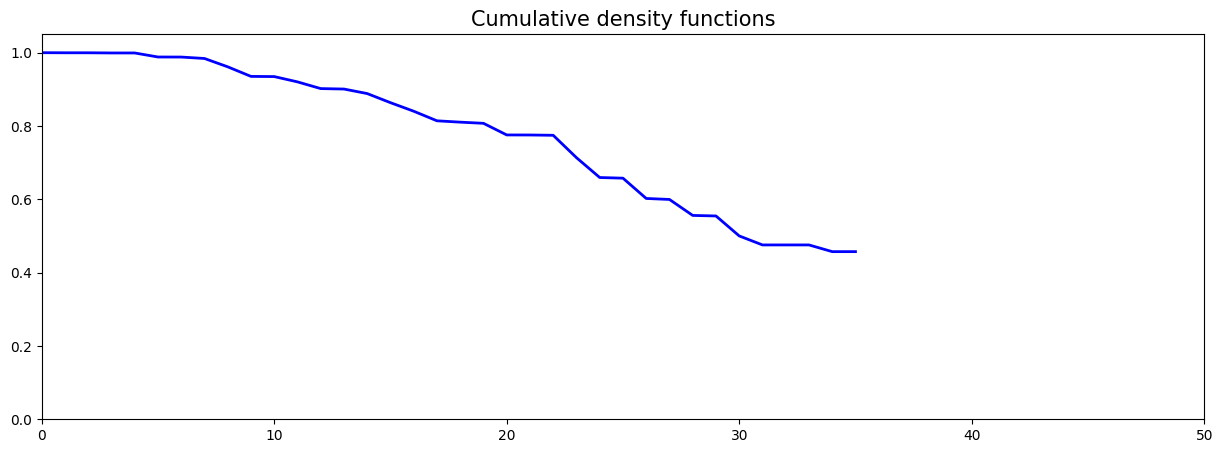

In [133]:
fig = plt.subplots(figsize=(15, 5))
cdf = model.predict_survival(X).flatten()
plt.plot(model.times, cdf, color="blue", lw=2)
title = "Cumulative density functions"
plt.title(title, fontsize=15)
plt.xlim(0, 50)
plt.ylim(0, 1.05)
plt.show()

In [5]:
from pydantic import EmailStr
from email_validator import validate_email, EmailNotValidError

In [7]:


testEmail = "example@stackabu.com"

try:
    emailObject = validate_email(testEmail, check_deliverability=True)
    testEmail = emailObject.email
    print(testEmail)
except EmailNotValidError as errorMsg:
    print(str(errorMsg))


The domain name stackabu.com does not exist.
